## EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('tourism.csv', encoding = 'unicode-escape', dtype = None, low_memory = False)

In [3]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2
1,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2
2,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1
3,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1
4,2002,January-March,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1


In [4]:
df.isnull().sum()

year             0
quarter          0
market           0
dur_stay         0
mode             0
mode_detail      0
nationality      0
purpose          0
sex              0
age              0
package          0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64

In [5]:
df.shape

(443010, 15)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443010 entries, 0 to 443009
Data columns (total 15 columns):
year             443010 non-null object
quarter          443010 non-null object
market           443010 non-null object
dur_stay         443010 non-null object
mode             443010 non-null object
mode_detail      443010 non-null object
nationality      443010 non-null object
purpose          443010 non-null object
sex              443010 non-null object
age              443010 non-null object
package          443010 non-null object
Visits (000s)    443010 non-null float64
Spend (£m)       443010 non-null float64
Nights (000s)    443010 non-null float64
sample           443010 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 312.3 MB


In [7]:
df.nunique()

year                 18
quarter               4
market               73
dur_stay              6
mode                  3
mode_detail          11
nationality          75
purpose               6
sex                   3
age                   8
package               2
Visits (000s)    161313
Spend (£m)       370326
Nights (000s)    288171
sample               69
dtype: int64

In [8]:
 df[['quarter', 'dur_stay', 'mode', 'mode_detail', 'purpose', 'sex', 'age', 'package']] =  df[['quarter', 'dur_stay', 'mode', 'mode_detail', 'purpose', 'sex', 'age', 'package']].astype('category')

In [9]:
df.year.unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019P'], dtype=object)

In [10]:
df.year.replace('2019P', '2019', inplace = True)

In [11]:
df['year'] = df['year'].astype('int64')

In [12]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443010 entries, 0 to 443009
Data columns (total 15 columns):
year             443010 non-null int64
quarter          443010 non-null category
market           443010 non-null object
dur_stay         443010 non-null category
mode             443010 non-null category
mode_detail      443010 non-null category
nationality      443010 non-null object
purpose          443010 non-null category
sex              443010 non-null category
age              443010 non-null category
package          443010 non-null category
Visits (000s)    443010 non-null float64
Spend (£m)       443010 non-null float64
Nights (000s)    443010 non-null float64
sample           443010 non-null int64
dtypes: category(8), float64(3), int64(2), object(2)
memory usage: 74.8 MB


In [13]:
col_names = {'Visits (000s)': 'visits', 'Spend (£m)': 'spend', 'Nights (000s)': 'nights'}
df = df.rename(columns = col_names)

In [14]:
df.quarter.unique()

[January-March, April-June, July-September, October-December]
Categories (4, object): [January-March, April-June, July-September, October-December]

In [15]:
df = df.replace(['January-March', 'April-June', 'July-September', 'October-December'], ['Q1', 'Q2', 'Q3', 'Q4'])

In [16]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1


In [17]:
df['per_tourist'] = df.spend / df.visits
df.per_tourist.fillna(0, inplace = True)

In [18]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2,0.02703
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2,0.06200
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1,0.16200
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1,0.02700
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1,0.00000


In [19]:
df.describe()

,year,visits,spend,nights,sample,per_tourist
count,443010.000000,443010.000000,443010.000000,443010.000000,443010.000000,4.430100e+05
mean,2010.182718,1.293075,0.729893,9.909916,1.807657,inf
std,4.995472,1.982608,1.899529,26.942452,2.451946,NaN
min,2002.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2006.000000,0.392937,0.074671,1.181872,1.000000,1.400000e-01
50%,2010.000000,0.721019,0.260128,3.534925,1.000000,3.532536e-01
75%,2014.000000,1.425891,0.711861,9.134462,2.000000,8.164782e-01
max,2019.000000,62.593937,226.402128,4022.016250,78.000000,inf


In [20]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2,0.02703
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2,0.06200
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1,0.16200
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1,0.02700
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1,0.00000


In [21]:
df.tail()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
443005,2019,Q3,Other Africa,15+ nights,Air,Air,Other Africa,Study,Male,25-34,Independent,0.464177,0.835519,41.77593,1,1.800
443006,2019,Q3,Other Africa,15+ nights,Air,Air,Other Africa,Miscellaneous,Male,55-64,Independent,0.498113,1.003698,9.96226,1,2.015
443007,2019,Q3,Other Africa,Not Known,Air,Air,Kenya,Transit,Male,45-54,Independent,0.000000,0.000000,0.00000,1,0.000
443008,2019,Q3,Other Areas / Unknown,Not Known,Air,Air,Other areas / unknown,Holiday,Not Known,Not Known,Independent,0.000000,5.682977,0.00000,1,inf
443009,2019,Q3,Other Areas / Unknown,Not Known,Sea,Sea - Not Known,Other areas / unknown,Holiday,Not Known,Not Known,Independent,0.000000,5.682977,0.00000,1,inf


In [22]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2,0.02703
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2,0.06200
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1,0.16200
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1,0.02700
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1,0.00000


1. What was the year with highest number of tourists?
2. Which market had the highest total quarterly visits to London?
3. What is the most popular mode of travel in 2017 for tourists from France?
4. Which market was the source of the most visitss for Business purpose in 2017?
5. What are the portions of visits according to purpose during each year?
6. Which market had the highest number of visitors traveled by the sea?
7. What age group traveled to London the most in 2014-2018 period?
8. is there any relationship between purpose of visit and money spent in UK, what graphs could best explain this relationship?
9. Is there any significant difference using Air transportation beween female and male?
10. Explain overnight visits for a decade between 2002-2012 based on purpose of visit, which grapph do you think best illustrate the case.



## What was the year with highest number of tourists?

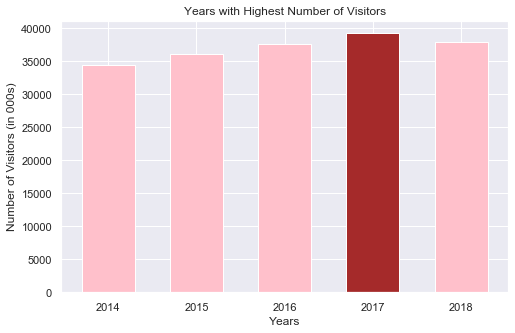

In [23]:
yearly_visits = df.groupby('year').visits.sum()
top5_yearly = yearly_visits.sort_values(ascending = False).head(5)

sns.set()
_ = plt.figure(figsize = (8, 5))
_ = plt.bar(top5_yearly.index, top5_yearly.values, width = 0.6, color=('brown', 'pink', 'pink', 'pink', 'pink'))
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of Visitors (in 000s)')
_ = plt.title('Years with Highest Number of Visitors')

## Which market had the highest total quarterly visits to London?

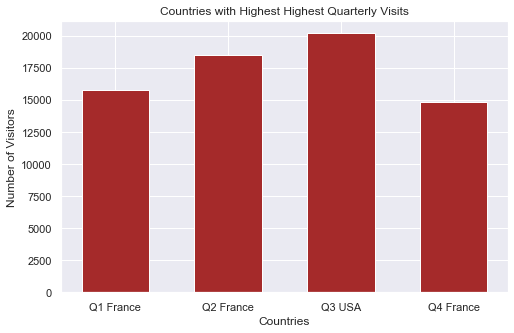

In [24]:
quarterly = df.groupby(['quarter', 'market']).visits.sum().unstack()

countries = pd.Series(quarterly.idxmax(axis = 1), name = 'Country')
visits = pd.Series(quarterly.max(axis = 1), name = 'Visits')

quarterly = pd.concat([countries, visits], axis = 1).reset_index()
quarterly['QCountry'] = quarterly.quarter + ' ' + quarterly.Country
quarterly.drop(columns = ['quarter', 'Country'], inplace = True)

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(quarterly.QCountry, quarterly.Visits, color = 'brown', width = 0.6)
_ = plt.xlabel('Countries')
_ = plt.ylabel('Number of Visitors')
_ = plt.title('Countries with Highest Highest Quarterly Visits')

## What is the most popular mode of travel in 2017 for tourists from France?

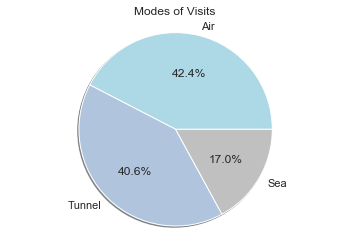

In [25]:
#Question3
grouped = df[(df['year'] == 2017) & (df['market'] == 'France')].groupby('mode').visits.sum()
sorted_group = pd.DataFrame(grouped.sort_values(ascending = False))

my_explode = (0, 0, 0)
my_colors = ['lightblue','lightsteelblue','silver']

_ = plt.pie(sorted_group['visits'], labels = ['Air', 'Tunnel', 'Sea'], autopct='%1.1f%%', radius = 1.5, explode = my_explode, shadow = True, colors = my_colors)

_ = plt.title('Modes of Visits')
_ = plt.axis('equal')

## Which market was the source of the most visits for Business purpose in 2017?

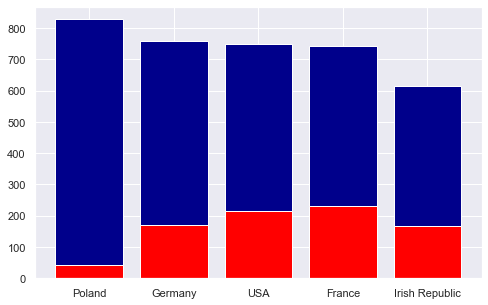

In [26]:
business2017 = df[(df.purpose == 'Business') & (df.year == 2017)]
business2017_market = pd.DataFrame(business2017.groupby(['market', 'sex'])['visits'].sum().unstack(), columns = ['Female', 'Male', 'NA'])

business2017_market['Total'] = business2017_market.Female + business2017_market.Male
business2017_market.drop(columns = 'NA', inplace = True)
business2017_top5market = business2017_market.sort_values(by = 'Total', ascending = False).head()

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(business2017_top5market.index, business2017_top5market.Total, color = 'darkblue')
_ = plt.bar(business2017_top5market.index, business2017_top5market['Female'], color = 'red')

## What are the portions of visits according to purpose during each year?

In [27]:
#Question 5
purpose_by_year = pd.pivot_table(df, values = 'visits', index = 'year', columns = 'purpose', 
                                 aggfunc = np.sum, margins = True)

for column in purpose_by_year.columns:
    purpose_by_year[column] = ((purpose_by_year[column]/purpose_by_year['All'])*100).round(1)
    
purpose_by_year.drop('All', axis = 1, inplace = True)
purpose_by_year.drop('All', axis = 0, inplace = True)

purpose_by_year


purpose,Business,Holiday,Miscellaneous,Study,Transit,VFR
year,,,,,,
2002,29.6,32.0,9.1,2.8,0.0,26.5
2003,28.2,32.3,8.8,2.5,0.0,28.2
2004,26.9,33.4,9.2,2.1,0.0,28.3
2005,27.3,32.4,9.3,2.0,0.0,29.0
2006,27.6,32.3,9.2,2.1,0.0,28.8
2007,27.0,32.8,8.6,2.0,0.0,29.7
2008,25.5,34.3,8.0,1.8,0.0,30.5
2009,22.0,38.2,8.7,1.7,0.0,29.4
2010,22.8,39.2,8.2,1.7,0.0,28.2


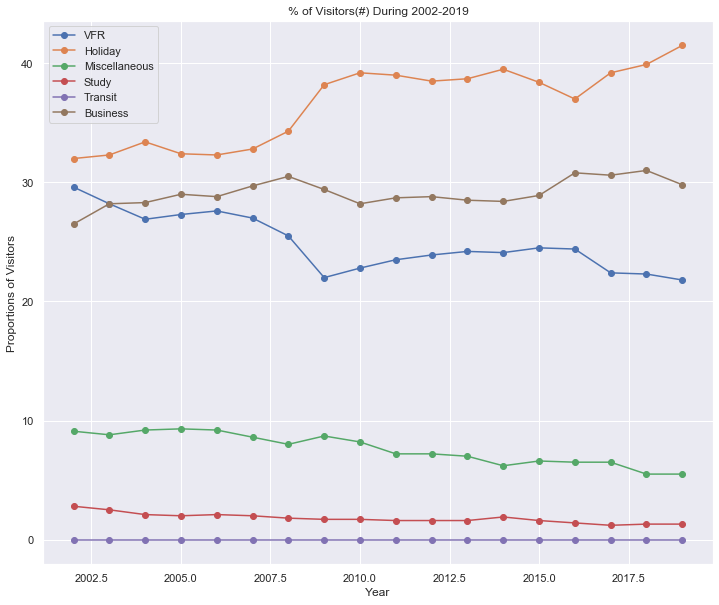

In [28]:
_ = plt.figure(figsize = (12, 10))

for column in purpose_by_year.columns:
    
    _ = plt.plot(purpose_by_year.index, purpose_by_year[column], marker='o')
    
_ = plt.xlabel('Year')
_ = plt.ylabel('Proportions of Visitors')
_ = plt.title('% of Visitors(#) During 2002-2019')
_ = plt.legend(('VFR', 'Holiday', 'Miscellaneous', 'Study', 'Transit', 'Business'))
plt.show()


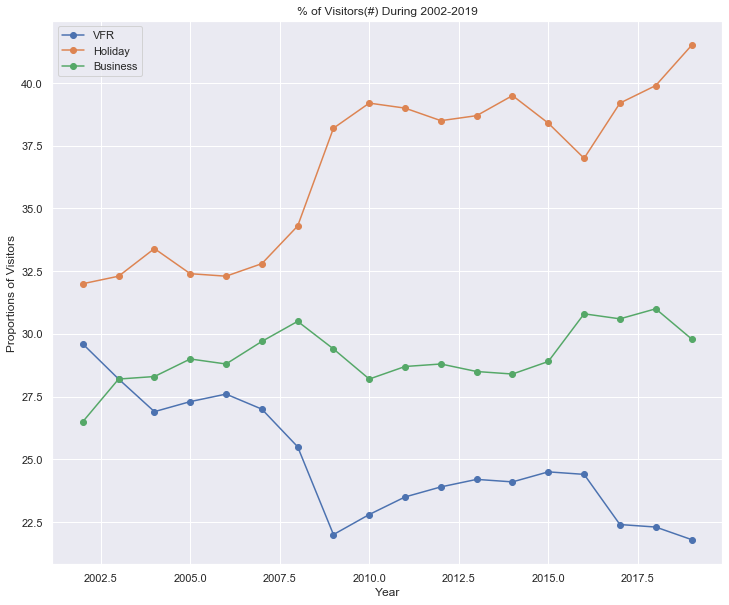

In [29]:
_ = plt.figure(figsize = (12, 10))


for column in ['Business', 'Holiday', 'VFR']:
    
    _ = plt.plot(purpose_by_year.index, purpose_by_year[column], marker='o')

_ = plt.xlabel('Year')
_ = plt.ylabel('Proportions of Visitors')
_ = plt.title('% of Visitors(#) During 2002-2019')
_ = plt.legend(('VFR', 'Holiday', 'Business'))
plt.show()

## Which market had the highest number of visitors traveled by the sea?

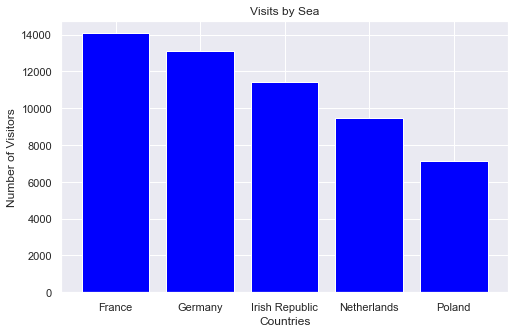

In [30]:
sea_visit = df[df['mode'] == 'Sea'].groupby('market').visits.sum().sort_values(ascending = False).head()

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(sea_visit.index, sea_visit.values, color = 'blue')
_ = plt.xlabel('Countries')
_ = plt.ylabel('Number of Visitors')
_ = plt.title('Visits by Sea')
plt.show()

## What age group traveled to London the most in 2014-2018 period?

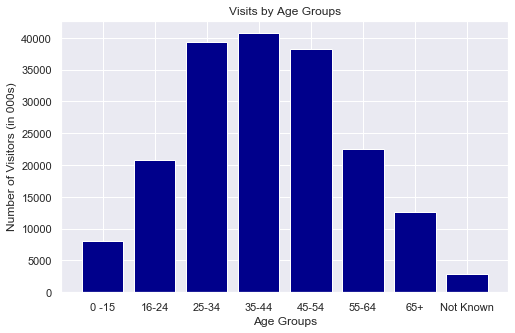

In [31]:
travel14_18 = df[(df['year'] > 2013) & (df['year'] < 2019)]
age14_18 = travel14_18.groupby('age').visits.sum()

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(age14_18.index, age14_18.values, color = 'darkblue')
_ = plt.xlabel('Age Groups')
_ = plt.ylabel('Number of Visitors (in 000s)')
_ = plt.title('Visits by Age Groups')
plt.show()

<BarContainer object of 6 artists>

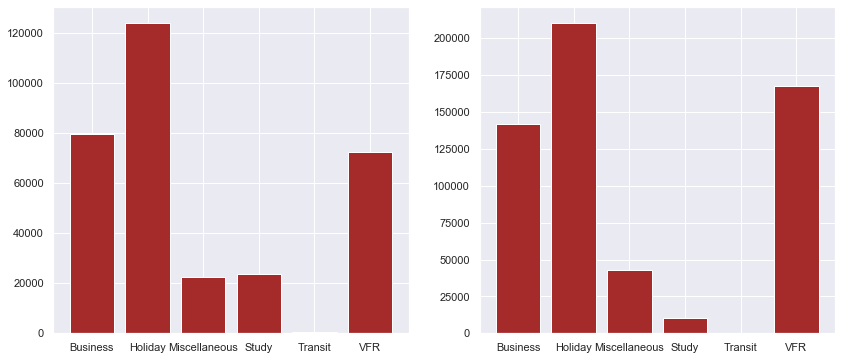

In [32]:
spent_by_purpose = df.groupby('purpose').spend.sum()
visits_by_purpose = df.groupby('purpose').visits.sum()

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
axs[0].bar(spent_by_purpose.index, spent_by_purpose.values, color = 'brown')
axs[1].bar(visits_by_purpose.index, visits_by_purpose.values, color = 'brown')

## STATISTICAL ANALYSIS

In [33]:
data = df['spend']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.312, p=0.000
Probably not Gaussian


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
